# Regresión Red Simple (Perceptrón Multicapa)
## Imports Necesarios

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor

# Cargar Datos de Entrada

In [2]:
np.random.seed(1)

In [4]:
#cargamos los datos de entrada
#header=0,
#data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)

data = pd.read_csv("../05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)



# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010


In [5]:
data

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104827,2.67,0.34800,0.338000,0.32700,0.31700,0.306000,0.286000,0.221000,0.190000,0.170000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226
104828,2.57,0.33800,0.327000,0.31700,0.30600,0.286000,0.221000,0.190000,0.170000,0.211000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226
104829,2.29,0.32700,0.317000,0.30600,0.28600,0.221000,0.190000,0.170000,0.211000,0.251000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226
104830,1.91,0.31700,0.306000,0.28600,0.22100,0.190000,0.170000,0.211000,0.251000,0.301000,...,0.226000,0.22600,0.22600,0.22600,0.226000,0.226000,0.226000,0.226000,0.226000,0.226


# Separar Datos de Entrenamiento (Train) y Test

In [6]:
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:45]
y_train = dataset_train[:,45]

dataset_test = data_test.values
x_test = dataset_test[:,0:45]
y_test = dataset_test[:,45]


In [7]:
x_train[0]

array([5.35486486, 0.266     , 0.266     , 0.266     , 0.266     ,
       0.266     , 0.266     , 0.266     , 0.266     , 0.272     ,
       0.278     , 0.283     , 0.289     , 0.295     , 0.301     ,
       0.306     , 0.312     , 0.318     , 0.324     , 0.329     ,
       0.335     , 0.341     , 0.347     , 0.352     , 0.358     ,
       0.364     , 0.37      , 0.375     , 0.381     , 0.387     ,
       0.393     , 0.398     , 0.404     , 0.433     , 0.439     ,
       0.444     , 0.45      , 0.456     , 0.462     , 0.467     ,
       0.473     , 0.479     , 0.485     , 0.49      , 0.496     ])

In [8]:
y_train[0]

0.502

## Crear Modelo, Entrenarlo y Predecir

In [9]:
neuronas = 1575

nn = MLPRegressor(
    hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

hist=nn.fit(x_train, y_train)

#test_x = np.array(x)

y_pred_train = nn.predict(x_train)
y_pred_test = nn.predict(x_test)

Iteration 1, loss = 0.00483155
Validation score: 0.896067
Iteration 2, loss = 0.00273141
Validation score: 0.910208
Iteration 3, loss = 0.00245552
Validation score: 0.916388
Iteration 4, loss = 0.00234371
Validation score: 0.911805
Iteration 5, loss = 0.00233116
Validation score: 0.914723
Iteration 6, loss = 0.00227924
Validation score: 0.920378
Iteration 7, loss = 0.00225373
Validation score: 0.920859
Iteration 8, loss = 0.00223840
Validation score: 0.921936
Iteration 9, loss = 0.00223164
Validation score: 0.916678
Iteration 10, loss = 0.00222143
Validation score: 0.921615
Iteration 11, loss = 0.00218812
Validation score: 0.923214
Iteration 12, loss = 0.00217628
Validation score: 0.922884
Iteration 13, loss = 0.00215217
Validation score: 0.924602
Iteration 14, loss = 0.00212969
Validation score: 0.920984
Iteration 15, loss = 0.00210724
Validation score: 0.925290
Iteration 16, loss = 0.00211083
Validation score: 0.922547
Iteration 17, loss = 0.00209494
Validation score: 0.926470
Iterat

## Obtener Metricas del Modelo

In [63]:
#print('Coefficients: \n', nn.coef_)
print("Mean squared error train: %.2f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error test: %.2f" % mean_squared_error(y_test, y_pred_test))

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE train: %.2f" % (rmse) )

#print('Score : {:.3f}'.format(nn.score(x_test, y_test)))
#print('num of layers: ', nn.n_layers_)
print('R^2: ', nn.score(x_train, y_train)) 
print('R^2 B: ', r2_score(y_train, y_pred_train)) 
print('current loss computed with the loss function: ', nn.loss_)

Mean squared error train: 0.00
Mean squared error test: 0.00
RMSE train: 0.05
R^2:  0.9570000408081091
R^2 B:  0.957000040808109
current loss computed with the loss function:  0.0012363107474908605


## Graficar Resultados

In [11]:
#pred_train = y_predict
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]
corr = np.corrcoef(y_test, y_pred_test)

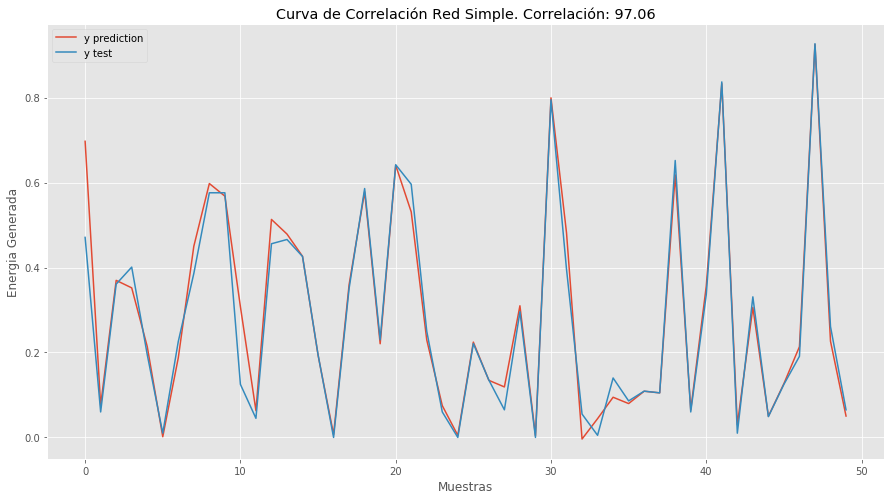

In [44]:
plt.plot(pred_test_plot, label ="y prediction")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Curva de Correlación Red Simple. Correlación: %.2f" % ( corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Muestras")
plt.legend()
plt.show()

In [58]:
val_scr = nn.validation_scores_ 
#val_scr

In [56]:
loss_val = []
for ind in val_scr:
    loss_val.append((ind))
    #print(1-ind)
    

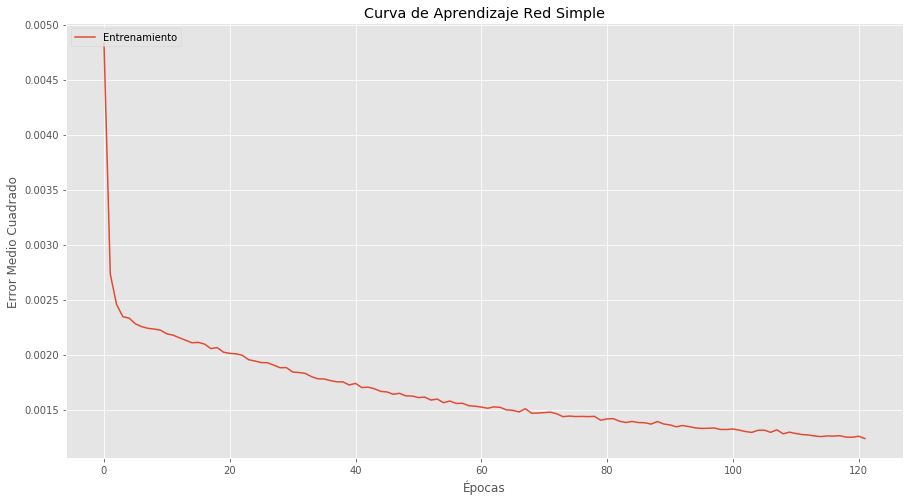

In [61]:
# Plot training & validation loss values

plt.plot(nn.loss_curve_)
plt.title('Curva de Aprendizaje Red Simple')
plt.ylabel('Error Medio Cuadrado')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento'], loc='upper left')
plt.show()

#pd.DataFrame(model.loss_curve_).plot()

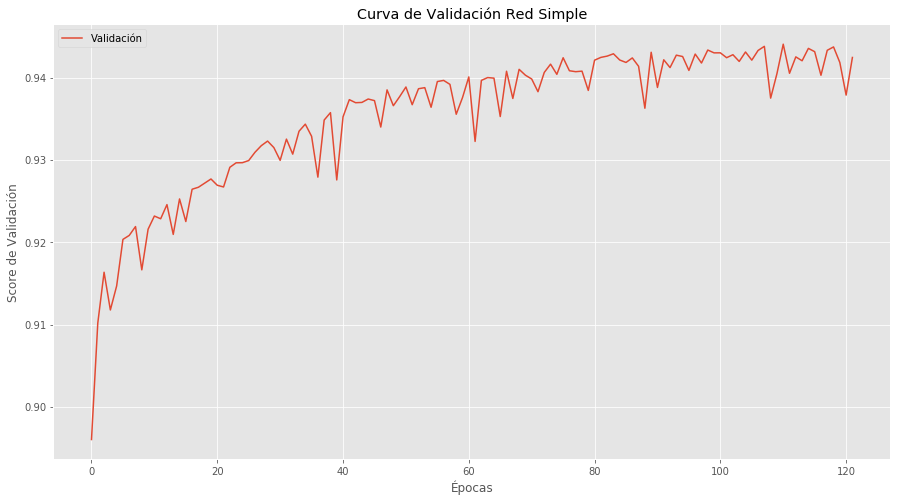

In [62]:
# Plot training & validation loss values

#plt.plot(nn.loss_curve_)
#plt.plot(loss_val)
plt.plot(loss_val)
plt.title('Curva de Validación Red Simple')
plt.ylabel('Score de Validación')
plt.xlabel('Épocas')
plt.legend(['Validación'], loc='upper left')
plt.show()

#pd.DataFrame(model.loss_curve_).plot()

In [ ]:
### Error Mínimo Cuadrdo

In [38]:
#from sklearn.model_selection import learning_curve

#train_sizes = [0.05, 0.15,0.5, 0.75, 1]

#train_sizes, train_scores, valid_scores = learning_curve(
#                                                        MLPRegressor(hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
#    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
#    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
#                                                                     ), 
#                                                        x_train, 
#                                                        y_train, 
#                                                        train_sizes=train_sizes, 
#                                                        cv=5,
#                                                        random_state=0,
#                                                        scoring = 'neg_mean_squared_error')

In [39]:
#train_scores_mean = -train_scores.mean(axis = 1)
#validation_scores_mean = -valid_scores.mean(axis = 1)

In [40]:
#plt.plot(train_sizes, train_scores_mean, label = 'Error entrenamiento')
#plt.plot(train_sizes, validation_scores_mean, label = 'Error validación')

#plt.ylabel('MSE', fontsize = 14)
#plt.xlabel('Datos de entrenamiento', fontsize = 14)

#title = 'Error mínimo cuadrado'
#plt.title(title, fontsize = 18, y = 1.03)
#plt.legend()

In [ ]:
### Función de Pérdida (Loss)

In [41]:
#train_sizes = [0.05, 0.15,0.5, 0.75, 1]

#train_sizes, train_scores, valid_scores = learning_curve(
#                                                        MLPRegressor(hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
#    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
#    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
#                                                                     ), 
#                                                        x_train, 
#                                                        y_train, 
#                                                        train_sizes=train_sizes, 
#                                                        cv=5,
#                                                        random_state=0,
#                                                        scoring = 'neg_mean_absolute_error')

In [109]:
#train_scores_mean_abs = -train_scores.mean(axis = 1)
#validation_scores_mean_abs = -valid_scores.mean(axis = 1)

In [42]:
#plt.plot(train_sizes, train_scores_mean_abs, label = 'Error entrenamiento')
#plt.plot(train_sizes, validation_scores_mean_abs, label = 'Error validación')

#plt.ylabel('Pérdida (loss)', fontsize = 14)
#plt.xlabel('Datos de entrenamiento', fontsize = 14)

#title = 'Función de pérdida (loss)'
#plt.title(title, fontsize = 18, y = 1.03)
#plt.legend()

## Guarda Datos Predicción

In [111]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_redNN.csv')

